In [7]:
path_price = '../../raw_data/pro_companies_price_bloomberg_df_v2.csv'
columns_to_keep_price = ['AAPL_date', 'AAPL_adjusted_close']

## 1. Stuff

In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet

## 2. Import Data

In [60]:
def import_price_data(path_price, columns_to_keep_price):
    price_data = pd.read_csv(path_price)
    price_df = price_data.copy()
    price_df = pd.DataFrame(price_df, columns=columns_to_keep_price)
    price_df['AAPL_date'] = pd.to_datetime(price_df['AAPL_date'], format='mixed')
    prophet_df=price_df.rename(columns={'AAPL_date': 'ds', 'AAPL_adjusted_close':'y'})

    return prophet_df

In [61]:
prophet_df=import_price_data(path_price, columns_to_keep_price)

In [90]:
def plot_prophet_results(df, periods=30, y_range=None):
    # Fit the Prophet model
    m = Prophet()
    m.fit(df)

    # Create a DataFrame with future dates for prediction
    future = m.make_future_dataframe(periods=periods)

    # Make predictions
    forecast = m.predict(future)

    # Plot the actual data
    fig, ax = plt.subplots()
    df.plot(x='ds', y='y', label='Actual Data', ax=ax, color='blue')

    # Plot the predicted trend
    ax.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='-', label='Predicted Trend')

    # Set y-axis range if specified
    if y_range:
        ax.set_xlim(y_range)

    # Show the plot
    plt.legend()
    plt.show()

    return forecast

11:00:38 - cmdstanpy - INFO - Chain [1] start processing
11:00:40 - cmdstanpy - INFO - Chain [1] done processing


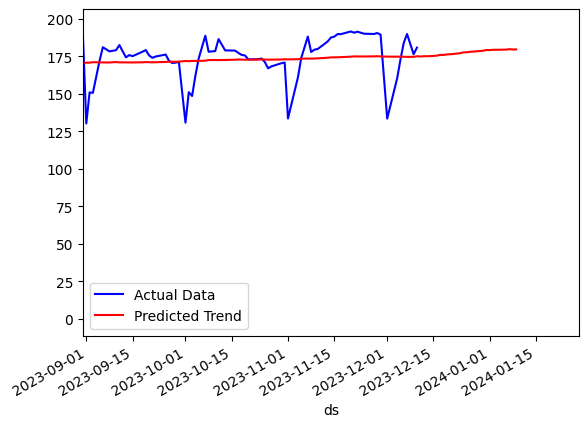

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-05-12,0.193335,-11.863633,10.146635,0.193335,0.193335,-0.655975,-0.655975,-0.655975,-0.089301,-0.089301,-0.089301,-0.566673,-0.566673,-0.566673,0.0,0.0,0.0,-0.462639
1,1983-06-12,0.194745,-11.534483,9.852790,0.194745,0.194745,-0.315558,-0.315558,-0.315558,0.210752,0.210752,0.210752,-0.526310,-0.526310,-0.526310,0.0,0.0,0.0,-0.120812
2,1983-07-12,0.196110,-10.729641,11.210148,0.196110,0.196110,0.435581,0.435581,0.435581,0.088441,0.088441,0.088441,0.347140,0.347140,0.347140,0.0,0.0,0.0,0.631691
3,1983-08-12,0.197520,-10.914766,11.255026,0.197520,0.197520,0.212221,0.212221,0.212221,-0.075414,-0.075414,-0.075414,0.287636,0.287636,0.287636,0.0,0.0,0.0,0.409741
4,1983-09-12,0.198930,-11.785280,11.866218,0.198930,0.198930,-0.047397,-0.047397,-0.047397,-0.025280,-0.025280,-0.025280,-0.022118,-0.022118,-0.022118,0.0,0.0,0.0,0.151532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10105,2024-01-05,177.586247,168.018188,191.087394,177.586247,177.586247,1.768041,1.768041,1.768041,-0.075414,-0.075414,-0.075414,1.843455,1.843455,1.843455,0.0,0.0,0.0,179.354287
10106,2024-01-06,177.644286,168.561401,190.795189,177.644286,177.644286,1.725322,1.725322,1.725322,-0.095960,-0.095960,-0.095960,1.821281,1.821281,1.821281,0.0,0.0,0.0,179.369607
10107,2024-01-07,177.702325,168.706236,190.962193,177.702325,177.702325,1.987371,1.987371,1.987371,0.210752,0.210752,0.210752,1.776619,1.776619,1.776619,0.0,0.0,0.0,179.689696
10108,2024-01-08,177.760364,168.778476,191.215184,177.760364,177.760364,1.685759,1.685759,1.685759,-0.025280,-0.025280,-0.025280,1.711039,1.711039,1.711039,0.0,0.0,0.0,179.446123


In [91]:
plot_prophet_results(prophet_df, periods=30, y_range=(19600, 19750))

In [10]:
def labeling_df(price_df):
    """
    Label a DataFrame by creating a new column 'label', set all values to 0 in that column, 
    set the values to 1 if open price is lower than adjusted close.

    Parameters:
    - formated_df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: labeled DataFrame.
    """
    # Step 1: Create a new column 'Label' and initialize with 0 (down)
    price_df['label'] = 0

    # Step 2: Label +1 (up) where 'Open' is lower than 'Adj Close'
    price_df.loc[price_df['open'] < price_df['adj_close'], 'label'] = 1

    # Step 4: Rename df
    labeled_df = price_df

    return labeled_df

In [11]:
labeled_df = labeling_df(price_df)

In [12]:
num_bins = labeled_df['label'].nunique()
label_counts = labeled_df['label'].value_counts()

print(f'Number of Bins: {num_bins}')
print(f'Number of labels per Bins: {label_counts}')

Number of Bins: 2
Number of labels per Bins: label
0    31644
1    31194
Name: count, dtype: int64


In [13]:
def moving_averages(df, column_name='adj_close', window_sizes=[5, 20]):
    """
    Add Moving Averages (MA) columns to the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which moving averages are calculated.
    - window_sizes (list): List of window sizes for moving averages. Default is [5, 20].

    Returns:
    - pd.DataFrame: DataFrame with added MA columns.
    """
    for window_size in window_sizes:
        ma_column_name = f'MA_{window_size}'
        df[ma_column_name] = df[column_name].rolling(window=window_size).mean()

    return df

In [14]:
def bollinger_bands(df, column_name='adj_close', window_size=20, num_std_dev=2):
    """
    Calculate Bollinger Bands for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which Bollinger Bands are calculated.
    - window_size (int): Window size for the moving average. Default is 20.
    - num_std_dev (int): Number of standard deviations for the upper and lower bands. Default is 2.

    Returns:
    - pd.DataFrame: DataFrame with added columns for Bollinger Bands (BB up, BB down).
    """
    # Calculate the rolling mean (middle band)
    df['middle_band'] = df[column_name].rolling(window=window_size).mean()

    # Calculate the rolling standard deviation
    df['std_dev'] = df[column_name].rolling(window=window_size).std()

    # Calculate Bollinger Bands
    df['bb_up'] = df['middle_band'] + num_std_dev * df['std_dev']
    df['bb_down'] = df['middle_band'] - num_std_dev * df['std_dev']

    # Drop intermediate columns
    df.drop(['middle_band', 'std_dev'], axis=1, inplace=True)

    return df

In [15]:
def rdp(df, column_name='adj_close'):
    """
    Calculate Relative Difference in the Percentage of the price (RDP(1)) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which RDP(1) is calculated.

    Returns:
    - pd.DataFrame: DataFrame with an added column for RDP(1).
    """
    # Calculate RDP(1)
    df['rdp_1'] = df[column_name].pct_change() * 100

    return df

In [16]:
def bias(df, column_name='adj_close', ma_windows=[6, 12, 24]):
    """
    Calculate Bias Ratios (BIAS) for specified moving average windows for a column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which BIAS is calculated.
    - ma_windows (list): List of moving average window sizes. Default is [6, 12, 24].

    Returns:
    - pd.DataFrame: DataFrame with added columns for BIAS(6), BIAS(12), and BIAS(24).
    """
    for window_size in ma_windows:
        ma_column_name = f'MA_{window_size}'
        bias_column_name = f'BIAS_{window_size}'

        # Calculate the moving average
        df[ma_column_name] = df[column_name].rolling(window=window_size).mean()

        # Calculate BIAS
        df[bias_column_name] = ((df[column_name] - df[ma_column_name]) / df[ma_column_name]) * 100

        # Drop intermediate columns
        df.drop(ma_column_name, axis=1, inplace=True)

    return df

In [17]:
def rsi(df, column_name='adj_close', window=14):
    """
    Calculate the Relative Strength Index (RSI) for a specified column in a DataFrame.

    Parameters:
    - df: (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which RSI is calculated. Default is 'Close'.
    - window (int): Window size for RSI calculation. Default is 14.

    Returns:
    - pd.DataFrame: DataFrame with an added column for RSI.
    """
    # Calculate daily price changes
    df['price_change'] = df[column_name].diff()

    # Calculate the average gain and average loss over the specified window
    df['gain'] = df['price_change'].apply(lambda x: x if x > 0 else 0).rolling(window=window, min_periods=1).mean()
    df['loss'] = -df['price_change'].apply(lambda x: x if x < 0 else 0).rolling(window=window, min_periods=1).mean()

    # Calculate relative strength (RS)
    df['rs'] = df['gain'] / df['loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1 + df['rs']))

    # Drop intermediate columns
    df.drop(['price_change', 'gain', 'loss', 'rs'], axis=1, inplace=True)

    return df

In [18]:
def ema(df, column_name='adj_close', ema_short=12, ema_long=26):
    """
    Calculate Exponential Moving Averages (EMA) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which EMA is calculated. Default is 'Close'.
    - ema_short (int): Short-term EMA window size. Default is 12.
    - ema_long (int): Long-term EMA window size. Default is 26.

    Returns:
    - pd.DataFrame: DataFrame with added columns for EMA(12) and EMA(26).
    """
    # Calculate EMA(12)
    df['ema_12'] = df[column_name].ewm(span=ema_short, adjust=False).mean()

    # Calculate EMA(26)
    df['ema_26'] = df[column_name].ewm(span=ema_long, adjust=False).mean()

    return df

In [19]:
def macd(df, column_name='adj_close', ema_short=12, ema_long=26, signal_period=9):
    """
    Calculate Moving Average Convergence Divergence (MACD) and its signal line for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which MACD is calculated. Default is 'Close'.
    - ema_short (int): Short-term EMA window size. Default is 12.
    - ema_long (int): Long-term EMA window size. Default is 26.
    - signal_period (int): Signal line EMA window size. Default is 9.

    Returns:
    - pd.DataFrame: DataFrame with added columns for MACD, Signal Line, and MACD Histogram.
    """
    # Calculate short-term EMA
    df['ema_short'] = df[column_name].ewm(span=ema_short, adjust=False).mean()

    # Calculate long-term EMA
    df['ema_long'] = df[column_name].ewm(span=ema_long, adjust=False).mean()

    # Calculate MACD Line
    df['dif'] = df['ema_short'] - df['ema_long']

    # Calculate Signal Line
    df['signal_line'] = df['dif'].ewm(span=signal_period, adjust=False).mean()

    # Calculate MACD Histogram
    df['osc'] = df['dif'] - df['signal_line']

    # Drop intermediate columns
    df.drop(['ema_short', 'ema_long'], axis=1, inplace=True)

    return df

In [20]:
def psy(df, column_name='adj_close', psy_short=12, psy_long=24):
    """
    Calculate Psychological Line (PSY) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which PSY is calculated. Default is 'Close'.
    - psy_short (int): Short-term PSY window size. Default is 12.
    - psy_long (int): Long-term PSY window size. Default is 24.

    Returns:
    - pd.DataFrame: DataFrame with added columns for PSY(12) and PSY(24).
    """
    # Calculate the percentage of days where the closing price is higher than the previous day's closing price
    df['price_up'] = df[column_name].diff() > 0

    # Calculate PSY(12)
    df['psy_12'] = df['price_up'].rolling(window=psy_short).mean() * 100

    # Calculate PSY(24)
    df['psy_24'] = df['price_up'].rolling(window=psy_long).mean() * 100

    # Drop intermediate columns
    df.drop(['price_up'], axis=1, inplace=True)

    return df

In [21]:
def williams_percent_r(df, high_column='high', low_column='low', adj_close_column='adj_close', window=14):
    """
    Calculate Williams %R for a specified high, low, and close columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - high_column (str): Name of the column containing high prices. Default is 'High'.
    - low_column (str): Name of the column containing low prices. Default is 'Low'.
    - adj_close_column (str): Name of the column containing close prices. Default is 'Close'.
    - window (int): Window size for Williams %R calculation. Default is 14.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Williams %R.
    """
    # Calculate highest high and lowest low over the specified window
    df['hh'] = df[high_column].rolling(window=window).max()
    df['ll'] = df[low_column].rolling(window=window).min()

    # Calculate Williams %R
    df['williams_%r'] = (df['hh'] - df[adj_close_column]) / (df['hh'] - df['ll']) * -100

    # Drop intermediate columns
    df.drop(['hh', 'll'], axis=1, inplace=True)

    return df

In [22]:
def stochastic_oscillator(df, high_column='high', low_column='low', adj_close_column='adj_close', k_window=14, d_window=3):
    """
    Calculate Stochastic Oscillator (%K and %D) for specified high, low, and close columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - high_column (str): Name of the column containing high prices. Default is 'High'.
    - low_column (str): Name of the column containing low prices. Default is 'Low'.
    - close_column (str): Name of the column containing close prices. Default is 'Close'.
    - k_window (int): Window size for %K calculation. Default is 14.
    - d_window (int): Window size for %D calculation. Default is 3.

    Returns:
    - pd.DataFrame: DataFrame with added columns for Stochastic %K and %D.
    """
    # Calculate lowest low and highest high over the specified window
    df['ll'] = df[low_column].rolling(window=k_window).min()
    df['hh'] = df[high_column].rolling(window=k_window).max()

    # Calculate Stochastic %K
    df['stochastic_%k'] = ((df[adj_close_column] - df['ll']) / (df['hh'] - df['ll'])) * 100

    # Calculate Stochastic %D (3-day simple moving average of %K)
    df['stochastic_%d'] = df['stochastic_%k'].rolling(window=d_window).mean()

    # Drop intermediate columns
    df.drop(['ll', 'hh'], axis=1, inplace=True)

    return df

In [23]:
def proc(df, column_name='adj_close', window=1):
    """
    Calculate Percentage of Price Change (PROC) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which PROC is calculated. Default is 'Close'.
    - window (int): Window size for PROC calculation. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for PROC.
    """
    # Calculate the percentage change in price using rolling window
    df['proc'] = df[column_name].pct_change().rolling(window=window).mean() * 100

    return df

In [24]:
def momentum(df, column_name='adj_close', window=1):
    """
    Calculate Momentum (MO) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which Momentum is calculated. Default is 'Close'.
    - window (int): Window size for Momentum calculation. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Momentum.
    """
    # Calculate the difference in price over the specified window
    df['momentum'] = df[column_name].diff(window)

    return df

In [25]:
def first_order_lag(df, column_name='adj_close', lag=1):
    """
    Calculate First-Order Lag (LAG(1)) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - column_name (str): Name of the column for which the lag is calculated. Default is 'Close'.
    - lag (int): Number of periods to lag. Default is 1.

    Returns:
    - pd.DataFrame: DataFrame with an added column for the First-Order Lag.
    """
    # Calculate the First-Order Lag using the shift() method
    df[f'LAG_{lag}'] = df[column_name].shift(lag)

    return df

In [26]:
def trading_volume(df, volume_column='volume'):
    """
    Calculate Trading Volume (VOL) for a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - volume_column (str): Name of the column containing trading volume. Default is 'Volume'.

    Returns:
    - pd.DataFrame: DataFrame with an added column for Trading Volume.
    """
    df['vol'] = df[volume_column]

    return df

In [27]:
def feature_selection(labeled_df):

    moving_averages(labeled_df)
    bollinger_bands(labeled_df)
    rdp(labeled_df)
    bias(labeled_df)
    rsi(labeled_df)
    ema(labeled_df)
    macd(labeled_df)
    psy(labeled_df)
    williams_percent_r(labeled_df)
    stochastic_oscillator(labeled_df)
    proc(labeled_df)
    momentum(labeled_df)
    first_order_lag(labeled_df)
    trading_volume(labeled_df)

    return labeled_df

In [28]:
labeled_features_df = feature_selection(labeled_df)

In [29]:
def cleaned_df(labeled_features_df, columns_to_drop=['open', 'high', 'low', 'adj_close', 'volume']):
    """
    Drop specified columns from a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns_to_drop (list): List of column names to drop. Default is ['Open', 'High', 'Low', 'Adj_Close', 'Volume'].

    Returns:
    - pd.DataFrame: DataFrame with specified columns dropped.
    """
    # Drop specified columns
    cleaned_df = labeled_features_df.drop(columns=columns_to_drop, errors='IgnoreRaise')

    # Drop rows with NaN values
    cleaned_df = cleaned_df.dropna()

    return cleaned_df

In [30]:
cleaned_df = cleaned_df(labeled_features_df, columns_to_drop)

In [31]:
def scale_dataframe(cleaned_df):
    """
    Scale a DataFrame using Standard scaling.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: Scaled DataFrame.
    """
    # Scale the selected columns
    scaler = StandardScaler()

    index_column = cleaned_df.index
    
    label_column = cleaned_df['label']
    int_df = cleaned_df.drop(columns=['label'])
    
    columns_to_scale = int_df.columns
    
    scaled_df = pd.DataFrame(scaler.fit_transform(int_df), columns=columns_to_scale)
    scaled_df.index = index_column
    scaled_df['label'] = label_column
    
    return scaled_df

In [32]:
scaled_df = scale_dataframe(cleaned_df)

In [33]:
def train_test_split(scaled_df, test_size=0.2):
    """
    Split a time series dataset into training and testing sets.

    Parameters:
    - df: the input time series dataset.
    - test_size (float): the proportion of the dataset to include in the test split.

    Returns:
    - df_train, df_test: Pandas arrays, representing features and target values for each set.
    """
    
    # Extract index number of splitting points
    len_df = len(scaled_df)
    index_1 = round(len_df*(1-(test_size)))
    index_2 = index_1 +1

    # Extract values at previously calculated splitting points
    date_1 = scaled_df.index[index_1]
    date_2 = scaled_df.index[index_2]

    # Construct train_df, val_df and test_df
    df_train = scaled_df[:date_1]
    df_test = scaled_df[date_2:]
    
    return df_train, df_test

In [34]:
df_train, df_test = train_test_split(scaled_df, test_size)

In [35]:
def split_X_y(df, window_size=10):
    """
    Reshape a DataFrames into two 3D NumPy arrays 

    Parameters:
    - df: DataFrame with a list of time series data
    - window_size: the number of time steps to consider for each observation

    Returns:
    - X: (num_observations, window_size, num_features)
    - y: (num_observations, num_features_to_predict)
    """
    df_np = df.to_numpy()
    X = []
    y = []
    
    df_X = df.drop('label', axis=1)
    df_y = df['label']

    for i in range(len(df_np)-(window_size)):
        row = df_X[i:i+window_size]
        X.append(row)
        label = df_y[i+(window_size)]
        y.append(label)

    # Shift the labels to get the label of the following sequence
    y_df_shifted = np.roll(df_y, 1)
    
    # Drop the first element from X_train_shifted and y_train_shifted
    X_df_shifted = df_X[1:]
    y_df_shifted = y_df_shifted[1:]

    X_df_shifted = np.array(X)
    y = np.array(y)
    y_df_shifted = np.expand_dims(y, axis=-1)
    
    return X_df_shifted, y_df_shifted

In [36]:
X_train, y_train = split_X_y(df_train, window_size)
X_test, y_test = split_X_y(df_test, window_size)

/var/folders/l4/q_79lrcx3ps_z7hltvr9nl4c0000gn/T/ipykernel_19899/1185561577.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_y[i+(window_size)]
/var/folders/l4/q_79lrcx3ps_z7hltvr9nl4c0000gn/T/ipykernel_19899/1185561577.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_y[i+(window_size)]


In [37]:
def one_hot_encode(y_train, y_test):

    label_encoder = LabelEncoder()
    encoded_y_train = label_encoder.fit_transform(y_train)
    y_train_cat = to_categorical(encoded_y_train)
    
    encoded_y_test = label_encoder.transform(y_test)
    y_test_cat = to_categorical(encoded_y_test)
    
    return y_train_cat, y_test_cat

In [38]:
y_train_cat, y_test_cat = one_hot_encode(y_train, y_test)

/Users/leopolddenassau/.pyenv/versions/3.10.6/envs/Financial_Trend_Forecasting/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/leopolddenassau/.pyenv/versions/3.10.6/envs/Financial_Trend_Forecasting/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
